### 1. Khai báo thư viện cần dùng

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### 2. Khởi tạo dữ liệu

In [4]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [5]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [6]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,49.848111,8.231199,6.449098,-0.571897,16.330996
1,52.573085,1.297589,10.446262,12.706096,24.421542
2,40.939034,6.005297,10.547847,28.157264,23.377742
3,31.921432,17.343814,9.461507,-6.585072,16.788215
4,58.670371,6.509166,7.714434,4.607747,17.304875


### 3. Trực quan hoá dữ liệu sinh ra

<AxesSubplot:ylabel='Density'>

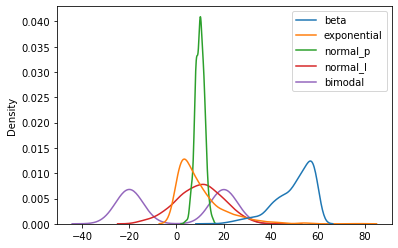

In [7]:
sns.kdeplot(data=df)

### 4. Hiển thị thống kê về dữ liệu sinh ra

In [9]:
df.describe()


,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.009774,9.866199,9.958236,9.900296,0.072687
std,8.355209,9.681614,1.914200,9.923416,20.268404
min,14.526955,0.001351,3.402395,-17.468809,-28.927890
25%,45.041424,2.861968,8.614106,3.077135,-19.896265
50%,52.223321,7.001433,9.973123,10.162735,0.005695
75%,56.727239,13.600672,11.313713,16.911487,20.219139
max,59.987268,77.556061,15.602910,45.680114,27.555356


### 5. Thêm một đặc trưng với giá trị lớn hơn nhiều

<AxesSubplot:ylabel='Density'>

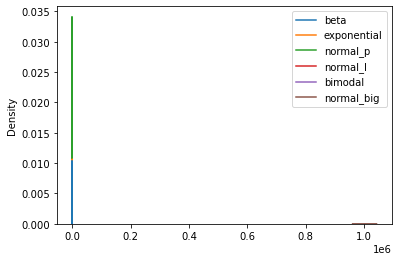

In [11]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot:>

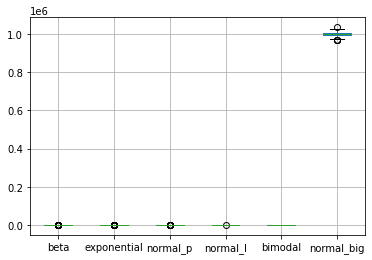

In [12]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

### 6. Chuẩn hoá với StandardScaler (Z-Score Scaling)

In [13]:
# Khai báo đối tượng StandardScaler
s_scaler = StandardScaler()

In [14]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = s_scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [15]:
df_s.head()


,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,-0.019358,-0.168961,-1.834131,-1.055829,0.802552,-0.398973
1,0.306946,-0.885482,0.255078,0.282887,1.201922,-0.884027
2,-1.086182,-0.398987,0.308174,1.840707,1.150397,-1.546722
3,-2.166001,0.772739,-0.259627,-1.662091,0.825121,-0.451379
4,1.037069,-0.346917,-1.172774,-0.533606,0.850625,0.523793


<AxesSubplot:ylabel='Density'>

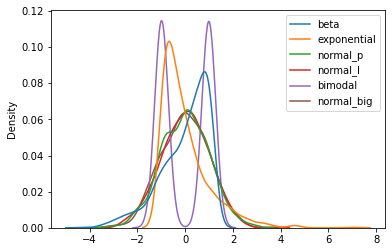

In [16]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

In [17]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,7.043255e-16,-6.632195e-17,1.079581e-15,2.514655e-17,-6.177281e-16,-3.001599e-15
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.248915e+00,-1.019436e+00,-3.426560e+00,-2.759413e+00,-1.431543e+00,-3.192804e+00
25%,-5.949386e-01,-7.238190e-01,-7.025404e-01,-6.879259e-01,-9.857186e-01,-7.002933e-01
50%,2.650627e-01,-2.960456e-01,7.781042e-03,2.645968e-02,-3.306910e-03,-7.533857e-05
75%,8.043876e-01,3.859213e-01,7.084712e-01,7.068836e-01,9.944805e-01,7.062173e-01
max,1.194762e+00,6.995087e+00,2.950318e+00,3.607399e+00,1.356615e+00,3.535931e+00


<AxesSubplot:>

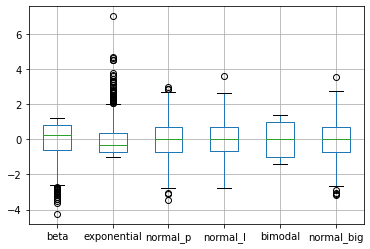

In [18]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot()

Chúng ta có thể thấy rằng các phân phối đã được điều chỉnh và giá trị trung bình là một số rất nhỏ gần bằng 0 và độ lệch chuẩn rất gần bằng 1 cho mỗi biến.